In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv("Agri.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.shape

(2200, 8)

In [17]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [19]:
df['label'].value_counts()


,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [23]:
df.groupby(['label']).mean()


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [24]:
x=df.drop(['label'],axis=1)


In [25]:
y=df['label']


In [26]:
from ipywidgets import interact
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(df.groupby(['label']).agg({conditions : ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [27]:
print("Summer Crop")
print(df[(df['temperature']>30)&(df['humidity']>50)]['label'].unique())
print("winter Crop")
print(df[(df['temperature']<20)&(df['humidity']>30)]['label'].unique())
print("Rainy Crop")
print(df[(df['rainfall']>200)&(df['humidity']>30)]['label'].unique())

Summer Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crop
['rice' 'papaya' 'coconut']


<ipython-input-32-a7430459848f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['K'],color='red')
<ipython-input-32-a7430459848f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'],color='blue')
<ipython-input-32-a7430459848f>:13: UserWarning: 

`distplot` is a deprecated function and 

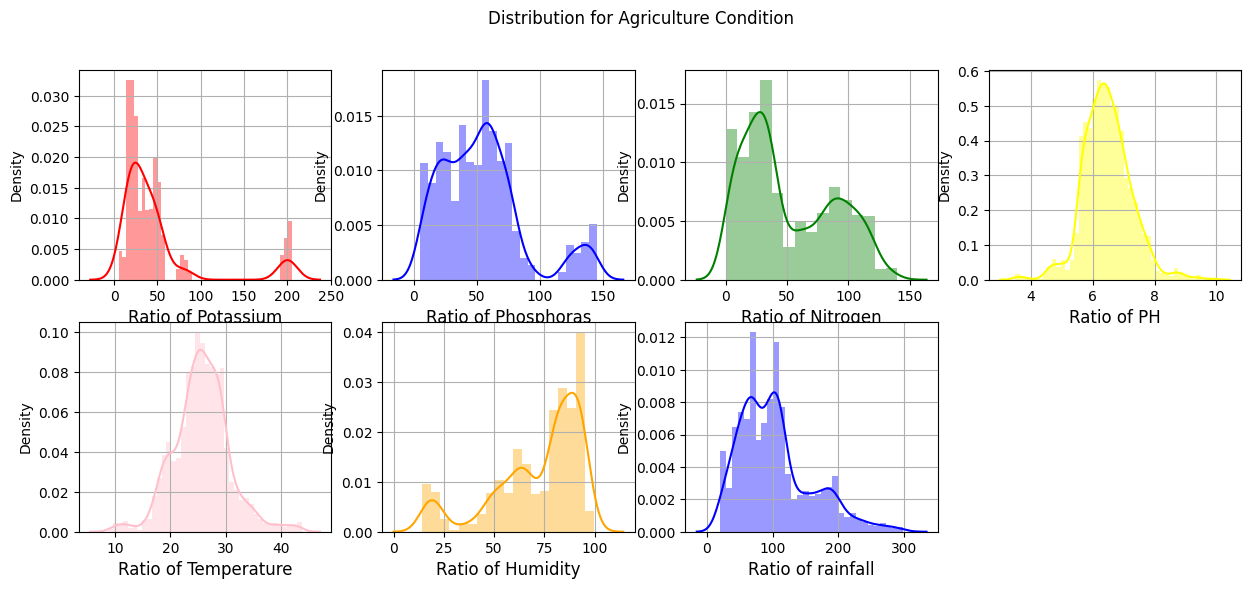

In [32]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(df['K'],color='red')
plt.xlabel('Ratio of Potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'],color='blue')
plt.xlabel('Ratio of Phosphoras',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['N'],color='green')
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['ph'],color='yellow')
plt.xlabel("Ratio of PH",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['temperature'],color='pink')
plt.xlabel('Ratio of Temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'],color='orange')
plt.xlabel('Ratio of Humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['rainfall'],color='blue')
plt.xlabel("Ratio of rainfall",fontsize=12)
plt.grid()

plt.suptitle("Distribution for Agriculture Condition")
plt.show()

In [33]:
from sklearn.cluster import KMeans


In [34]:
import sklearn.preprocessing as preprocessing
data_scaled=preprocessing.scale(x,axis=0)

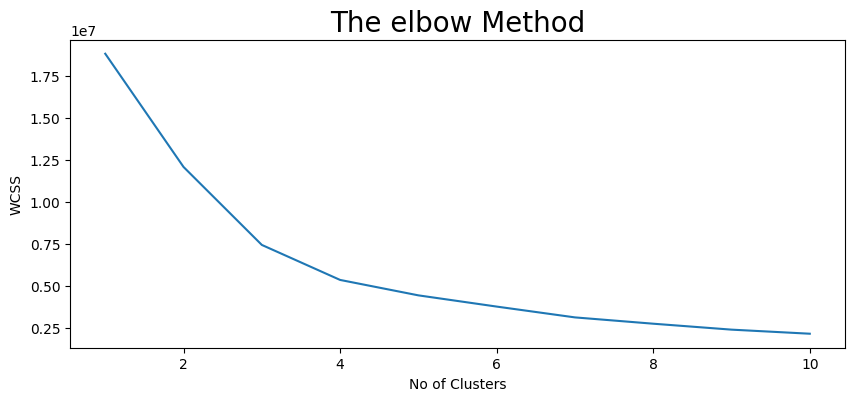

In [35]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[ ]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit(x)

In [37]:
y_pre=y_means.predict(x)


In [38]:
y_pre=pd.DataFrame(y_pre)
z=pd.concat([y_pre,y],axis=1)
z=z.rename(columns={0:'Clusters'})

In [39]:
print("Crops in first cluster")
print(z[z['Clusters']==0]['label'].unique())
print("Crops in second cluster")
print(z[z['Clusters']==1]['label'].unique())
print("Crops in third cluster")
print(z[z['Clusters']==2]['label'].unique())
print("Crops in fourth cluster")
print(z[z['Clusters']==3]['label'].unique())

Crops in first cluster
['grapes' 'apple']
Crops in second cluster
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in third cluster
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in fourth cluster
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [42]:
x1=df.drop(['label'],axis=1)
x1.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [44]:
y1=df['label']
y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [48]:
y_pred=log_model.predict(x_test)


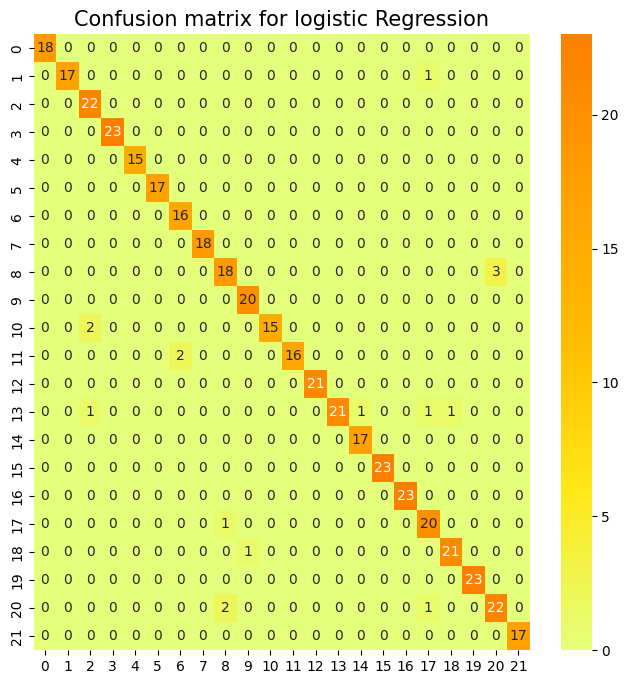

In [49]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(8,8)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion matrix for logistic Regression',fontsize=15)
plt.show()

In [50]:
predition=log_model.predict(np.array([[90,40,40,20,80,7,200]]))
print("The suggested Crop for such Climate:",predition)

The suggested Crop for such Climate: ['rice']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9613636363636363